In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df1 = pd.read_csv('DigiDB_digimonlist.csv')

In [33]:
df1.head(10)

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86
5,6,Koromon,In-Training,Free,Fire,3,0,940,52,109,93,52,76
6,7,Tanemon,In-Training,Free,Plant,3,0,1030,64,85,82,73,69
7,8,Tsunomon,In-Training,Free,Earth,3,0,930,54,107,92,54,76
8,9,Tsumemon,In-Training,Free,Dark,3,0,930,64,108,64,54,93
9,10,Tokomon,In-Training,Free,Neutral,3,0,640,86,76,74,74,103


In [34]:
df1.shape

(249, 13)

In [35]:
df1.describe()

,Number,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,125.000000,11.987952,1.574297,1210.883534,109.779116,124.518072,116.377510,112.638554,120.401606
std,72.024301,6.616501,0.854012,326.102384,32.454115,45.639372,32.132696,41.562888,32.633339
min,1.000000,2.000000,0.000000,530.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,63.000000,6.000000,1.000000,990.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,125.000000,12.000000,1.000000,1180.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,187.000000,18.000000,2.000000,1480.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,249.000000,25.000000,3.000000,2080.000000,203.000000,318.000000,213.000000,233.000000,218.000000


In [36]:
df1.describe(include=['O'])

,Digimon,Stage,Type,Attribute
count,249,249,249,249
unique,249,8,4,9
top,Knightmon,Mega,Virus,Dark
freq,1,74,82,37


In [37]:
df1['Stage'].value_counts()

Mega           74
Ultimate       58
Champion       54
Rookie         38
In-Training    11
Ultra           6
Baby            5
Armor           3
Name: Stage, dtype: int64

In [38]:
df1['Type'].value_counts()

Virus      82
Vaccine    70
Data       60
Free       37
Name: Type, dtype: int64

In [39]:
df1['Attribute'].value_counts()

Dark        37
Fire        33
Light       29
Neutral     28
Electric    25
Plant       25
Water       24
Wind        24
Earth       24
Name: Attribute, dtype: int64

<AxesSubplot:>

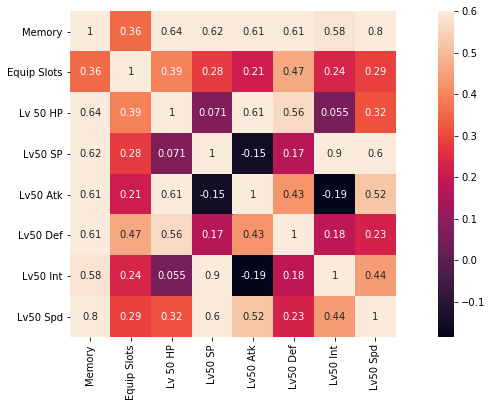

In [40]:
plt.figure(figsize=(15,6))
sns.heatmap(df1.drop('Number',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [41]:
cat_col = ['Stage','Type','Attribute']

In [42]:
for i in cat_col:
    print(df1[i].value_counts())

Mega           74
Ultimate       58
Champion       54
Rookie         38
In-Training    11
Ultra           6
Baby            5
Armor           3
Name: Stage, dtype: int64
Virus      82
Vaccine    70
Data       60
Free       37
Name: Type, dtype: int64
Dark        37
Fire        33
Light       29
Neutral     28
Electric    25
Plant       25
Water       24
Wind        24
Earth       24
Name: Attribute, dtype: int64


In [11]:
stage = pd.get_dummies(df1['Stage'],drop_first=True)
types = pd.get_dummies(df1['Type'],drop_first=True)
attribute = pd.get_dummies(df1['Attribute'],drop_first=True)

In [12]:
df1.drop(['Stage','Type','Attribute','Number','Digimon'],axis=1,inplace=True)

In [13]:
df = pd.concat([df1,stage,types,attribute],axis=1)

In [27]:
df.shape

(249, 26)

In [14]:
df.head()

,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd,Baby,Champion,...,Vaccine,Virus,Earth,Electric,Fire,Light,Neutral,Plant,Water,Wind
0,2,0,590,77,79,69,68,95,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,0,950,62,76,76,69,68,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,0,870,50,97,87,50,75,1,0,...,0,0,0,0,0,0,1,0,0,0
3,2,0,690,68,77,95,76,61,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,540,98,54,59,95,86,1,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
X = df.drop("Lv50 Spd", axis=1)
y = df['Lv50 Spd']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (249, 25)
Shape of y =  (249,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (174, 25)
Shape of y_train =  (174,)
Shape of X_test =  (75, 25)
Shape of y_test =  (75,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [56]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

# LogisticRegression

In [63]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf_score = clf.score(X_test, y_test)
clf_rmse = rmse(y_test, clf.predict(X_test))
clf_score, clf_rmse

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.14666666666666667, 24.54193689721059)

# Linear Regression

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(0.9436060891490601, 7.842090082883412)

#  Lasso 

In [49]:
lr_lasso = Lasso()
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test)
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8172105443647867, 14.118588802933276)

# ridge 

In [50]:
lr_ridge = Ridge()
lr_ridge.fit(X_train, y_train)
lr_ridge_score=lr_ridge.score(X_test, y_test)
lr_ridge_rmse = rmse(y_test, lr_ridge.predict(X_test))
lr_ridge_score, lr_ridge_rmse

(0.9296479562663985, 8.758990981525049)

# Support Vector Machine

In [51]:
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test)
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.24751984344307754, 28.645951080854402)

In [64]:
lsvm= LinearSVC()
lsvm.fit(X_train,y_train)
lsvm_score=lsvm.score(X_test,y_test)
lsvm_rmse = rmse(y_test, lsvm.predict(X_test))
lsvm_score, lsvm_rmse

c:\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(0.17333333333333334, 24.544109951948418)

In [52]:
svr1 = SVR(kernel='rbf')
svr1.fit(X_train,y_train)
svr_score=svr1.score(X_test,y_test)
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.24751984344307754, 28.645951080854402)

In [53]:
svr2 = SVR(kernel='poly', degree=2)
svr2.fit(X_train,y_train)
svr_score=svr2.score(X_test,y_test)
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.13991894850822972, 28.645951080854402)

# $k$-Nearest Neighbors

In [65]:
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(X_train,y_train)
kn_score=kn.score(X_test,y_test)
kn_rmse = rmse(y_test, kn.predict(X_test))
kn_score, kn_rmse

(0.13333333333333333, 30.17438207044733)

# Decision Tree

In [66]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
dt_rmse = rmse(y_test, dt.predict(X_test))
dt_score, dt_rmse

(0.12, 23.381474147994464)

### Gaussian Naive Bayes

In [68]:
G = GaussianNB()
G.fit(X_train,y_train)
G_score=G.score(X_test,y_test)
G_rmse = rmse(y_test, G.predict(X_test))
G_score, G_rmse

(0.09333333333333334, 29.715091564164272)

### Perceptron

In [69]:
P = Perceptron(max_iter=5, tol=None)
P.fit(X_train,y_train)
P_score=P.score(X_test,y_test)
P_rmse = rmse(y_test, P.predict(X_test))
P_score, P_rmse

(0.09333333333333334, 32.39382657235789)

### Stochastic Gradient Descent (SGD)

In [70]:
SGD = SGDClassifier(max_iter=5, tol=None)
SGD.fit(X_train,y_train)
SGD_score=SGD.score(X_test,y_test)
SGD_rmse = rmse(y_test, SGD.predict(X_test))
SGD_score, SGD_rmse

(0.10666666666666667, 31.12148239828345)

# Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test)
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.7488511987165609, 16.54936272690482)

In [24]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse}],
             columns=['Model','Score','RMSE']))

                    Model     Score       RMSE
0       Linear Regression  0.943606   7.842090
1                   Lasso  0.817211  14.118589
2  Support Vector Machine  0.247520  28.645951
3           Random Forest  0.748851  16.549363


# Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(RandomForestRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean()

(array([0.87819354, 0.83071483, 0.86912206, 0.86429542, 0.85115169,
        0.87283801, 0.92584222, 0.77587336, 0.80685392, 0.7829858 ]),
 0.845787085174153)